In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
file_path = "/content/drive/My Drive/Expend.csv"
df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,EX,ECAB,MET,GROW,YOUNG,OLD,WEST,STATE
0,256,85.5,19.7,6.9,29.6,11.0,0,ME
1,275,94.3,17.7,14.7,26.4,11.2,0,NH
2,327,87.0,0.0,3.7,28.5,11.2,0,VT
3,297,107.5,85.2,10.2,25.1,11.1,0,MA
4,256,94.9,86.2,1.0,25.3,10.4,0,RI


In [2]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EX      48 non-null     int64  
 1   ECAB    48 non-null     float64
 2   MET     48 non-null     float64
 3   GROW    48 non-null     float64
 4   YOUNG   48 non-null     float64
 5   OLD     48 non-null     float64
 6   WEST    48 non-null     int64  
 7   STATE   48 non-null     object 
dtypes: float64(5), int64(2), object(1)
memory usage: 3.1+ KB


,0
EX,0
ECAB,0
MET,0
GROW,0
YOUNG,0
OLD,0
WEST,0
STATE,0


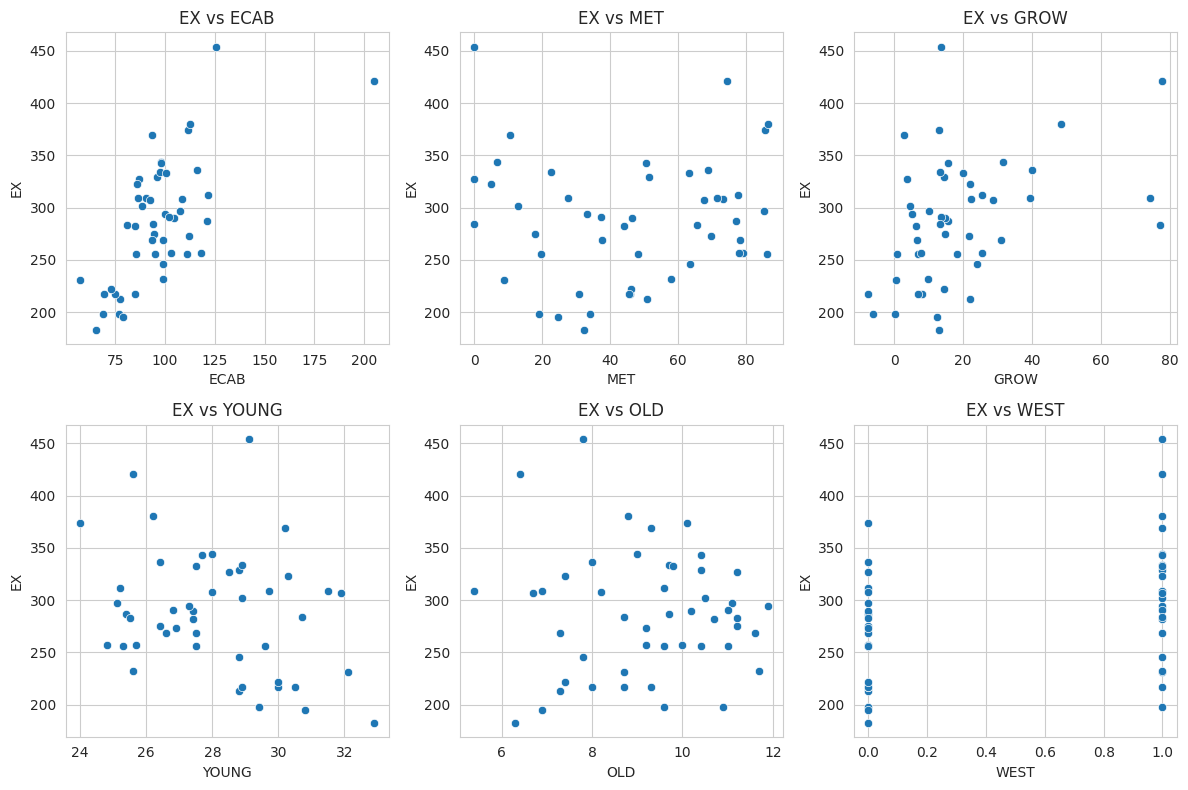

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
# independent variables
independent_vars = ["ECAB", "MET", "GROW", "YOUNG", "OLD", "WEST"]
# scatter plots
plt.figure(figsize=(12, 8))
for i, var in enumerate(independent_vars, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[var], y=df["EX"])
    plt.xlabel(var)
    plt.ylabel("EX")
    plt.title(f"EX vs {var}")

plt.tight_layout()
plt.show()


In [4]:
import statsmodels.api as sm
X = df[["ECAB", "MET", "GROW", "YOUNG", "OLD", "WEST"]]
X = sm.add_constant(X)
y = df["EX"]

# regression model
model = sm.OLS(y, X).fit()

# summary results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     EX   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     10.22
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           6.63e-07
Time:                        18:16:53   Log-Likelihood:                -241.20
No. Observations:                  48   AIC:                             496.4
Df Residuals:                      41   BIC:                             509.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        356.1818    306.486      1.162      0.2

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


  Variable          VIF
0    const  2840.189724
1     ECAB     2.711361
2      MET     2.671282
3     GROW     1.906089
4    YOUNG     7.647787
5      OLD     4.052655
6     WEST     1.433511


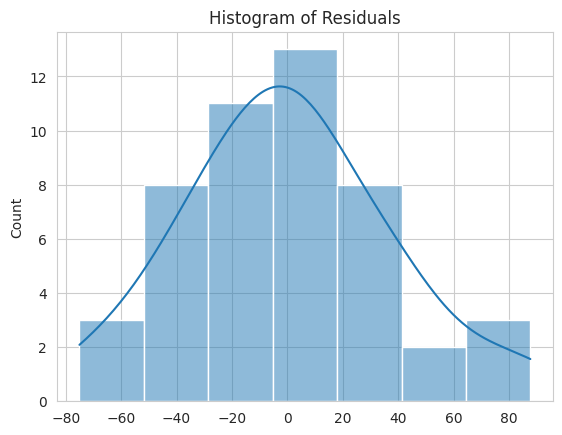

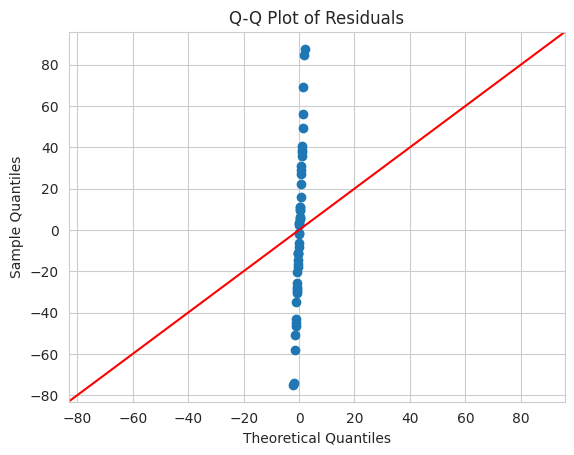

In [6]:
import scipy.stats as stats

# Histogram of residuals
residuals = model.resid
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line="45")
plt.title("Q-Q Plot of Residuals")
plt.show()


In [7]:
# Drop YOUNG and OLD
X_new = df[["ECAB", "MET", "GROW", "WEST"]]
X_new = sm.add_constant(X_new)

# new regression model
model_new = sm.OLS(y, X_new).fit()
print(model_new.summary())


                            OLS Regression Results                            
Dep. Variable:                     EX   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     15.11
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           8.60e-08
Time:                        18:17:26   Log-Likelihood:                -242.09
No. Observations:                  48   AIC:                             494.2
Df Residuals:                      43   BIC:                             503.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        115.0425     27.389      4.200      0.0

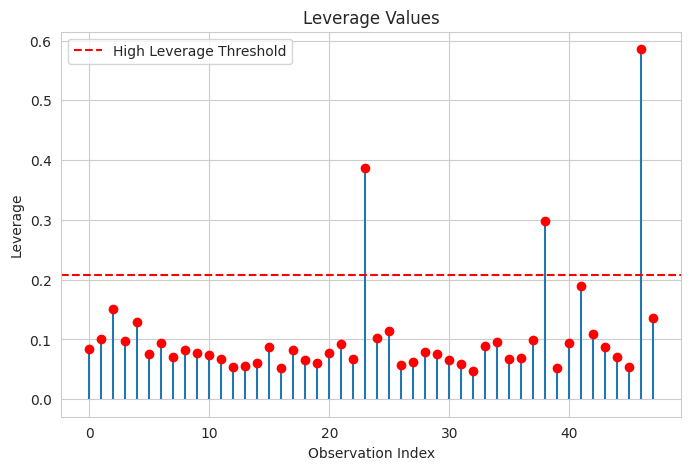

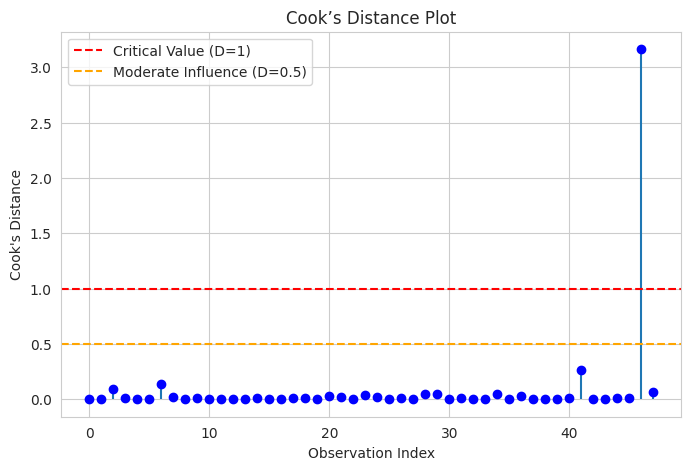

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# influence measures
influence = model_new.get_influence()
leverage = influence.hat_matrix_diag
cooks_d, _ = influence.cooks_distance

# Leverage vs Observation Index
plt.figure(figsize=(8,5))
plt.stem(range(len(leverage)), leverage, markerfmt="ro", basefmt=" ")
plt.axhline(2 * (X_new.shape[1] / len(X_new)), color="red", linestyle="dashed", label="High Leverage Threshold")
plt.xlabel("Observation Index")
plt.ylabel("Leverage")
plt.title("Leverage Values")
plt.legend()
plt.show()

# Cook’s Distance
plt.figure(figsize=(8,5))
plt.stem(range(len(cooks_d)), cooks_d, markerfmt="bo", basefmt=" ")
plt.axhline(1, color="red", linestyle="dashed", label="Critical Value (D=1)")
plt.axhline(0.5, color="orange", linestyle="dashed", label="Moderate Influence (D=0.5)")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.title("Cook’s Distance Plot")
plt.legend()
plt.show()


In [10]:
high_leverage_points = np.where(leverage > 2 * (X_new.shape[1] / len(X_new)))[0]
high_cooks_points = np.where(cooks_d > 1)[0]

print("High Leverage Points:", high_leverage_points)
print("Highly Influential Points (Cook’s D > 1):", high_cooks_points)


High Leverage Points: [23 38 46]
Highly Influential Points (Cook’s D > 1): [46]


High Leverage Points: [23 38 46]
Highly Influential Points (Cook’s D > 1): [46]

In [11]:
# Remove observation 46
df_refined = df.drop(index=46)

X_refined = df_refined[["ECAB", "MET", "GROW", "WEST"]]
X_refined = sm.add_constant(X_refined)
y_refined = df_refined["EX"]

# new regression model
model_refined = sm.OLS(y_refined, X_refined).fit()
print(model_refined.summary())

                            OLS Regression Results                            
Dep. Variable:                     EX   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     19.78
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           3.22e-09
Time:                        18:18:14   Log-Likelihood:                -230.45
No. Observations:                  47   AIC:                             470.9
Df Residuals:                      42   BIC:                             480.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.2391     32.122      1.004      0.3